<a href="https://colab.research.google.com/github/HilaShoshan/MusicGenreClassification/blob/main/MusicGenreClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Description

**My Data**

The data contains music from the following genres:

*blues, classical, country, disco, hiphop, jazz, metal, pop, reggae and rock.* 

There are several data bases that refer to the same music, and I'm using each one as needed. 

**My Questions**

I want to know if it is possible to classify a song for its genre based on an audio segment from it. 

More specific sub-questions are: 


1.   What is the technique that will bring the best results?

2.   Will using the techniques we learned with the data from the CSV files
only yield good results?

3. Will deep learning techniques, like CNN on the pictures data will predict
the genre in a good way?

4. Are there types of songs that a model would have a very hard time
distinguishing between?

5. Do genres that are not at all close to each other still have the same
characteristics (for example in a certain part of the music)?

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# warnings.filterwarnings("ignore")

# Read DataBases

**Audio files dataset**

A collection of 10 genres with 100 audio (wav) files each, all having a length of 30 seconds. 

In [108]:
import librosa, IPython
import librosa.display as lplt

def playSong(song_path): 

  audio_fp = 'drive/MyDrive/Colab Notebooks/Data/genres_original/' + song_path
  audio_data, sr = librosa.load(audio_fp)
  audio_data, _ = librosa.effects.trim(audio_data)

  return audio_data

In [109]:
def plotSong(audio_data):

  plt.figure(figsize=(15,5))
  lplt.waveplot(audio_data)
  plt.show()

In [110]:
# classical song example

class_audio_data = playSong("classical/classical.00018.wav")
IPython.display.Audio(class_audio_data, rate=sr)  # play sample file

In [111]:
# country

count_audio_data = playSong("country/country.00018.wav")
IPython.display.Audio(count_audio_data, rate=sr)  # play sample file

In [112]:
# metal

met_audio_data = playSong("metal/metal.00018.wav")
IPython.display.Audio(met_audio_data, rate=sr)  # play sample file

In [113]:
# plot zoomed audio wave 

def plotAudioWaves(audio_data):
  start = 1000
  end = 1200
  plt.figure(figsize=(16,4))
  plt.plot(audio_data[start:end])
  plt.show()

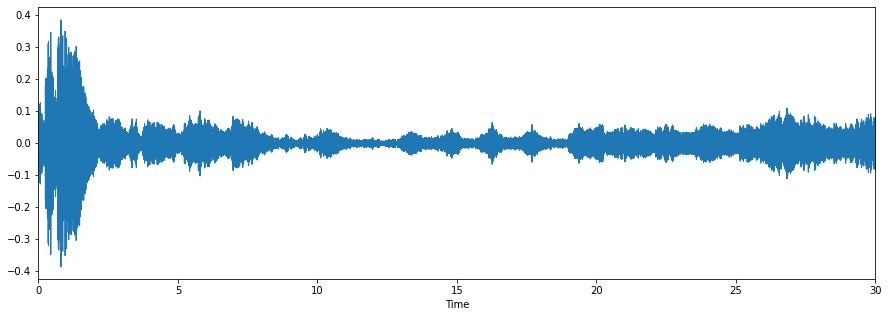

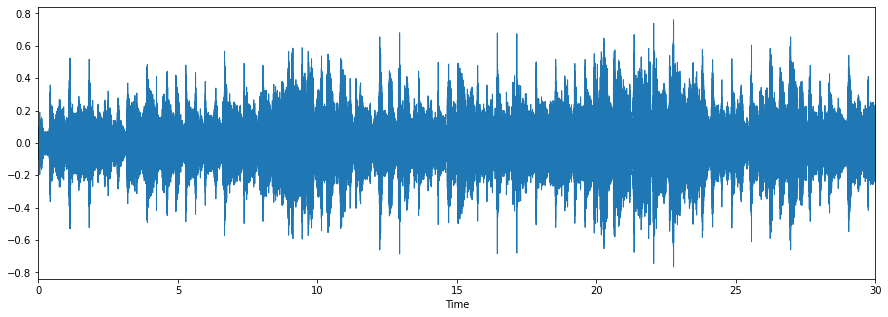

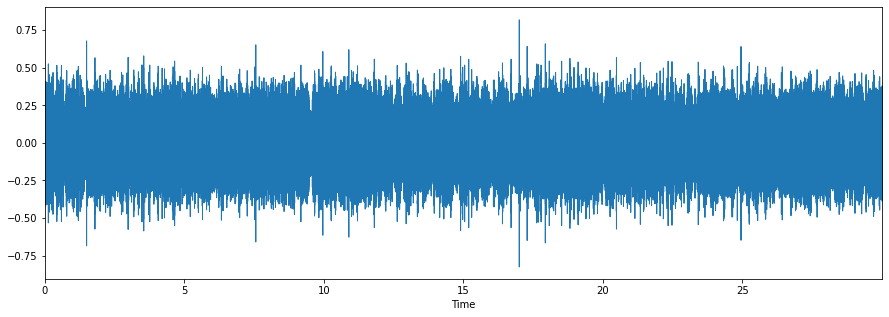

In [114]:
for audio_data in [class_audio_data, count_audio_data, met_audio_data]:   
  plotSong(audio_data)
  # plotAudioWaves(audio_data)

**Images dataset**

A visual representation for each audio file. The audio files were converted to Mel Spectrograms.

**CSV dataset**

Containing features of the audio files. One file has for each song (30 seconds long) a mean and variance computed over multiple features that can be extracted from an audio file. The other file has the same structure, but the songs were split before into 3 seconds audio files (this way increasing 10 times the amount of data we fuel into our classification models).

I'll read the 30-seconds-features for start. 

In [115]:
features_df = pd.read_csv("drive/MyDrive/Colab Notebooks/Data/features_30_sec.csv")
features_df.head(10)

filename  length  chroma_stft_mean  ...  mfcc20_mean  mfcc20_var  label
0  blues.00000.wav  661794          0.350088  ...     1.221291   46.936035  blues
1  blues.00001.wav  661794          0.340914  ...     0.531217   45.786282  blues
2  blues.00002.wav  661794          0.363637  ...    -2.231258   30.573025  blues
3  blues.00003.wav  661794          0.404785  ...    -3.407448   31.949339  blues
4  blues.00004.wav  661794          0.308526  ...   -11.703234   55.195160  blues
5  blues.00005.wav  661794          0.302456  ...    -8.109991   46.311005  blues
6  blues.00006.wav  661794          0.291328  ...    -6.483466   70.170364  blues
7  blues.00007.wav  661794          0.307955  ...    -8.630722   56.401436  blues
8  blues.00008.wav  661794          0.408879  ...    -2.715692   36.418430  blues
9  blues.00009.wav  661794          0.273950  ...    -4.235203   91.468811  blues

[10 rows x 60 columns]

In [116]:
print(features_df.shape, '\n')

print(features_df.isnull().sum())

(1000, 60) 

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
m

In [117]:
# features_df.describe()

features_df.label.value_counts().reset_index()

index  label
0     hiphop    100
1    country    100
2      blues    100
3      disco    100
4  classical    100
5       rock    100
6      metal    100
7        pop    100
8     reggae    100
9       jazz    100

# Arrange Dataset

In [118]:
del features_df['filename']
print(features_df.shape)

(1000, 59)


In [119]:
# all the columns on the csv file are numerical except from the label column 
# I'll use one label encoding to make it numeric
"""
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

features_df['label_encode'] = labelencoder.fit_transform(features_df['label'])

dont need to encode the label column also ... 
"""

"\nfrom sklearn.preprocessing import LabelEncoder\n\nlabelencoder = LabelEncoder()\n\nfeatures_df['label_encode'] = labelencoder.fit_transform(features_df['label'])\n\ndont need to encode the label column also ... \n"

In [120]:
# Split the data into X (features dataframe) and y (the label column)

X = features_df.iloc[:, 0:-1]
y = features_df[['label']]
print(X.shape)
print(y.shape, '\n')

(1000, 58)
(1000, 1) 



In [121]:
# Now I'll normalize the X data: 

from sklearn import preprocessing

x = X.values  # returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

X_norm.head(10)

0         1         2   ...        55        56        57
0  0.113487  0.362279  0.695468  ...  0.109503  0.599189  0.078255
1  0.113487  0.343622  0.793392  ...  0.099081  0.579640  0.075947
2  0.113487  0.389832  0.640692  ...  0.087317  0.501381  0.045405
3  0.113487  0.473508  0.777954  ...  0.062612  0.468060  0.048168
4  0.113487  0.277759  0.681062  ...  0.130173  0.233047  0.094836
5  0.113487  0.265416  0.676207  ...  0.069326  0.334841  0.077000
6  0.113487  0.242786  0.777675  ...  0.091521  0.380919  0.124900
7  0.113487  0.276598  0.760707  ...  0.137117  0.320089  0.097258
8  0.113487  0.481835  0.660159  ...  0.053232  0.487657  0.057140
9  0.113487  0.207447  0.751472  ...  0.167498  0.444611  0.167659

[10 rows x 58 columns]

# train test split

In [122]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 58)
(300, 58)
(700, 1)
(300, 1)


# Machine Learning Techniques

## SVC

---- explain 

In [123]:
# Import Support Vector Classifier
from sklearn.svm import SVC

# Create a svm Classifier
svc = SVC(probability=True, kernel='linear')  # Linear Kernel

# Train the model using the training sets
model = svc.fit(X_train, y_train.values.ravel())

# Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6866666666666666


## Adaboost

---- explain 

In [124]:
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifier object
# use the default DecisionTreeClassifier as base_estimator

adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1)

# Train Adaboost Classifier
model = adaboost.fit(X_train, y_train.values.ravel())

# Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.28


In [125]:
# use SVC as base_estimator

# Create adaboost classifier object
adaboost = AdaBoostClassifier(n_estimators=50, base_estimator=svc, learning_rate=1)

# Train Adaboost Classifier
model = adaboost.fit(X_train, y_train.values.ravel())

# Predict the response for test dataset
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.48333333333333334


## KNN

-- explain

In [126]:
from sklearn.neighbors import KNeighborsClassifier

# Create knn classifier object
knn = KNeighborsClassifier()

# Fit the model
model = knn.fit(X_train, y_train.values.ravel())

y_pred = model.predict(X_test)  # These are the predicted output values

# Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6433333333333333


## Decision Trees

-- explain

In [127]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = clf.fit(X_train, y_train.values.ravel())

# Predict the response for test dataset
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# cross validation
cross_val_score(clf, X_train, y_train.values.ravel(), cv=10)

Accuracy: 0.5333333333333333


array([0.61428571, 0.65714286, 0.68571429, 0.6       , 0.58571429,
       0.51428571, 0.64285714, 0.54285714, 0.52857143, 0.54285714])

# Clustering

## K-means

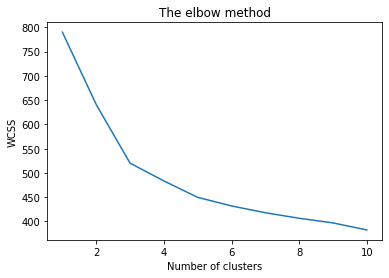

In [128]:
from sklearn.cluster import KMeans

# Finding the optimum number of clusters for k-means classification

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, allowing us to observe 'The elbow'

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # within cluster sum of squares
plt.show()

In [129]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 9, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_train)

In [130]:
"""
# Visualising the clusters
plt.scatter(X_train[y_kmeans == 0, 0], X_train[y_kmeans == 0, 1], s = 100, label = 'blues')
plt.scatter(X_train[y_kmeans == 1, 0], X_train[y_kmeans == 1, 1], s = 100, label = 'classical')
plt.scatter(X_train[y_kmeans == 2, 0], X_train[y_kmeans == 2, 1], s = 100, label = 'country')
plt.scatter(X_train[y_kmeans == 3, 0], X_train[y_kmeans == 3, 1], s = 100, label = 'disco')
plt.scatter(X_train[y_kmeans == 4, 0], X_train[y_kmeans == 4, 1], s = 100, label = 'hiphop')
plt.scatter(X_train[y_kmeans == 5, 0], X_train[y_kmeans == 5, 1], s = 100, label = 'jazz')
plt.scatter(X_train[y_kmeans == 6, 0], X_train[y_kmeans == 6, 1], s = 100, label = 'metal')
plt.scatter(X_train[y_kmeans == 7, 0], X_train[y_kmeans == 7, 1], s = 100, label = 'reggae')
plt.scatter(X_train[y_kmeans == 8, 0], X_train[y_kmeans == 8, 1], s = 100, label = 'rock')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, label = 'Centroids')

plt.legend()
"""

"\n# Visualising the clusters\nplt.scatter(X_train[y_kmeans == 0, 0], X_train[y_kmeans == 0, 1], s = 100, label = 'blues')\nplt.scatter(X_train[y_kmeans == 1, 0], X_train[y_kmeans == 1, 1], s = 100, label = 'classical')\nplt.scatter(X_train[y_kmeans == 2, 0], X_train[y_kmeans == 2, 1], s = 100, label = 'country')\nplt.scatter(X_train[y_kmeans == 3, 0], X_train[y_kmeans == 3, 1], s = 100, label = 'disco')\nplt.scatter(X_train[y_kmeans == 4, 0], X_train[y_kmeans == 4, 1], s = 100, label = 'hiphop')\nplt.scatter(X_train[y_kmeans == 5, 0], X_train[y_kmeans == 5, 1], s = 100, label = 'jazz')\nplt.scatter(X_train[y_kmeans == 6, 0], X_train[y_kmeans == 6, 1], s = 100, label = 'metal')\nplt.scatter(X_train[y_kmeans == 7, 0], X_train[y_kmeans == 7, 1], s = 100, label = 'reggae')\nplt.scatter(X_train[y_kmeans == 8, 0], X_train[y_kmeans == 8, 1], s = 100, label = 'rock')\n\n# Plotting the centroids of the clusters\nplt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, 